# Analyzing Personality Population (Brasil Escola) 🌊

Analysis of the texts generated by the **Persona-Predict V2** 🧠 service. Analyses were conducted using **100** randomly selected records from the Brasil Escola 🇧🇷 dataset, which comprises essays from Brazilian students:

  - [Brasil Escola](https://github.com/gpassero/uol-redacoes-xml/tree/master/brasilescola)

If the graphics are not rendered 🚫, use the address:

  - [View in NBViewer](https://nbviewer.org/github/NeuroQuestAi/neuroquest-examples/blob/main/products/persona-predict/notebooks/Persona-Predict-Pop-PT-BR.ipynb?flush_cache=true)

For more information 🔍 about the service visit: [docs.neuroquest.ai/persona-predict](https://docs.neuroquest.ai/persona-predict/)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utility as U

from wordcloud import WordCloud

pd.set_option("display.max_rows", 50)  
pd.set_option("display.max_columns", 10)

## Read Data 📊

In [2]:
df = pd.DataFrame(U.get_traits_from_batch_json_results())
df.head(5)

Number of JSON files found: 100


,essay,world_count,openness,imagination,artistic_interests,...,anger,depression,self_consciousness,immoderation,vulnerability
0,é cada vez mais crescente o número de mortos e...,230,76.867932,78.453399,74.823980,...,40.256341,30.577010,32.199128,34.215698,40.055206
1,"desde sua criação, as cotas raciais têm sido m...",261,82.566448,81.832274,82.066499,...,46.370320,36.428793,37.985172,39.546524,47.885358
2,o brasil é um país despreparado e sem qualquer...,435,72.663569,73.002011,71.464401,...,33.696274,24.550651,25.970898,27.838514,34.074130
3,o fundamentalismo islâmico é contrário à democ...,321,62.405338,63.151641,61.569786,...,36.227532,27.551988,28.475979,30.462015,35.883412
4,"ao se falar em racismo no brasil, vem em mente...",216,82.818649,82.371376,81.625064,...,33.677859,23.090391,24.880042,26.802270,33.467794


## Most used Words 🗣️

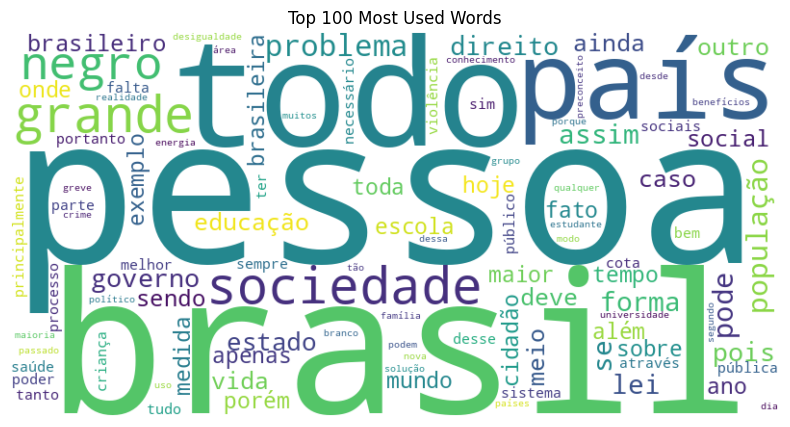

In [3]:
force_download_data = False
wordcloud = WordCloud(
    width=800, height=400, max_words=100, background_color="white"
).generate(U.remove_stop_words_from_essay(df=df, download_data=force_download_data))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Top 100 Most Used Words")
plt.show()

## 1. Big-Five Dimensions 🎭

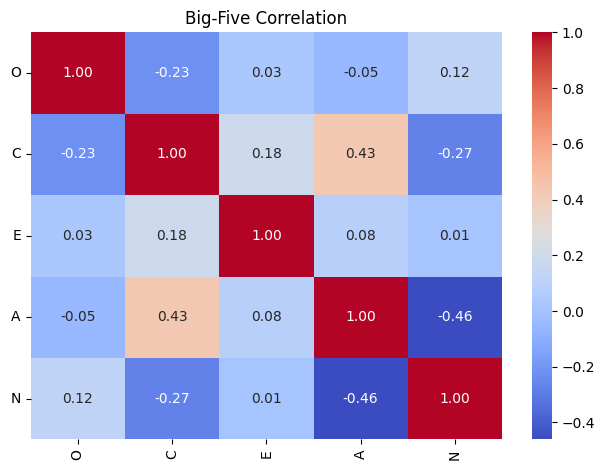

In [4]:
big5_acronym = ["O", "C", "E", "A", "N"]

correlation_matrix = df[
    ["openness", "conscientiousness", "extraversion", "agreeableness", "neuroticism"]
].corr()
ax = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

ax.set_xticklabels(big5_acronym)
ax.set_yticklabels(big5_acronym)

plt.title("Big-Five Correlation", fontsize=12)
plt.tight_layout()
plt.show()

In [5]:
big5_dimensions = [
    "openness",
    "conscientiousness",
    "extraversion",
    "agreeableness",
    "neuroticism",
]

U.plot_eda_boxplot(
    df=df,
    targets=big5_dimensions,
    ticktext=[x.capitalize() for x in big5_dimensions],
    title="Big-Five Facets",
    color=1,
)

In [6]:
U.plot_eda_radar(
    df=df, targets=big5_dimensions, title="Big-Five Personality Comparison"
)

## 2. Big-Five Openness & Facets 🧑‍🎨

In [7]:
openness_facets = [
    "imagination",
    "artistic_interests",
    "emotionality",
    "adventurousness",
    "intellect",
    "liberalism",
]

title = [x.replace("_", "-").capitalize() for x in openness_facets]

U.plot_eda_boxplot(
    df=df,
    targets=openness_facets,
    ticktext=title,
    title="Openness Facets",
    color=2,
)

In [8]:
U.plot_eda_radar(df=df, targets=openness_facets, title="Openness Facets Comparison")

## 2. Big-Five Conscientiousness & Facets 🧑‍🔬 

In [9]:
conscientiousness_facets = [
    "self_efficacy",
    "orderliness",
    "dutifulness",
    "achievement_striving",
    "self_discipline",
    "cautiousness",
]

title = [x.replace("_", "-").capitalize() for x in conscientiousness_facets]

U.plot_eda_boxplot(
    df=df,
    targets=conscientiousness_facets,
    ticktext=title,
    title="Conscientiousness Facets",
    color=3,
)

In [10]:
U.plot_eda_radar(
    df=df, targets=conscientiousness_facets, title="Conscientiousness Facets Comparison"
)

## 3. Big-Five Extraversion & Facets 🕺💃

In [11]:
extraversion_facets = [
    "friendliness",
    "gregariousness",
    "assertiveness",
    "activity_level",
    "excitement_seeking",
    "cheerfulness",
]

title = [x.replace("_", "-").capitalize() for x in extraversion_facets]

U.plot_eda_boxplot(
    df=df,
    targets=extraversion_facets,
    ticktext=title,
    title="Extraversion Facets",
    color=4,
)

In [12]:
U.plot_eda_radar(
    df=df, targets=extraversion_facets, title="Extraversion Facets Comparison"
)

## 4. Big-Five Agreeableness & Facets 🙋🧡

In [13]:
agreeableness_facets = [
    "trust",
    "morality",
    "altruism",
    "cooperation",
    "modesty",
    "sympathy",
]

title = [x.replace("_", "-").capitalize() for x in agreeableness_facets]

U.plot_eda_boxplot(
    df=df,
    targets=agreeableness_facets,
    ticktext=[x.capitalize() for x in title],
    title="Agreeableness Facets",
    color=5,
)

In [14]:
U.plot_eda_radar(
    df=df, targets=agreeableness_facets, title="Agreeableness Facets Comparison"
)

## 5. Big-Five Neuroticism & Facets 🙅💢

In [15]:
neuroticism_facets = [
    "anxiety",
    "anger",
    "depression",
    "self_consciousness",
    "immoderation",
    "vulnerability",
]

title = [x.replace("_", "-").capitalize() for x in agreeableness_facets]

U.plot_eda_boxplot(
    df=df,
    targets=neuroticism_facets,
    ticktext=title,
    title="Neuroticism Facets",
    color=6,
)